# Inferential Statistics Assignment

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# use credit card fraud dataset
data_url = 'https://raw.githubusercontent.com/Thinkful-Ed/data-science-lectures/master/credit_card_fraud.csv'

### Read the credit card fraud dataset into a Pandas data frame.

In [4]:
data = pd.read_csv(data_url)

data.head()

,transaction,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,DEBIT,7414.00,C446504763,151707.00,144293.00,C1854925027,39000000.0,39900000.0,0
1,2,DEBIT,2899.20,C757752441,0.00,0.00,C1854925027,39000000.0,39000000.0,0
2,3,CASH_OUT,17447.35,C1004533006,0.00,0.00,C1620573488,34400000.0,35000000.0,0
3,4,CASH_OUT,477.53,C23579491,0.00,0.00,C356023140,33800000.0,33800000.0,0
4,5,CASH_IN,18184.97,C861745646,6101058.91,6119243.88,C356023140,33800000.0,33800000.0,0


### Generate a histogram that shows the data distribution of the "amount" field in the data.

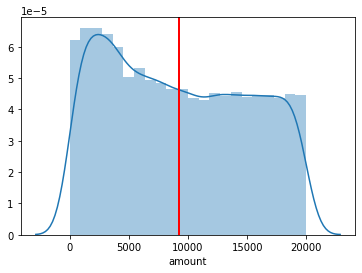

In [42]:
sns.distplot(data['amount'])

plt.axvline(data['amount'].mean(), color='red', linestyle='solid', linewidth=2)

### Randomly sample with replacement 1,000 records from the data set and calculate the mean of the "amount" field.

Run the cell a few times and see how the mean changes based on the records that are sampled.

In [44]:
df_amount_rand1000 = data['amount'].sample(len(data), replace=True)

df_amount_rand1000.mean()

9256.477915726166

### Bootstrap a sampling distribution for the "amount" field means and generate a histogram showing the distribution of values.

- Generate one sampling distribution using 1,000 samples of size 1,000.
- Generate another sampling distribution using 5,000 samples that are each the size of the original data set.
- Note the differences between the two sampling distributions.

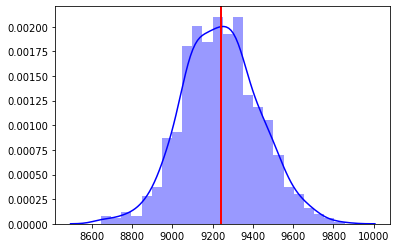

In [40]:
means_1000 = [data['amount'].sample(n=1000, replace=True).mean() for i in range(1000)]
sns.distplot(a=means_1000, color='blue')
plt.axvline(sum(means_1000)/len(means_1000), color='red', linestyle='solid', linewidth=2)

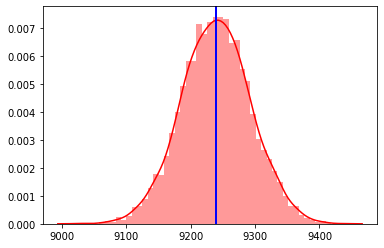

In [41]:
means_5000 = [data['amount'].sample(n=len(data['amount']), replace=True).mean() for i in range(5000)]
sns.distplot(a=means_5000, color='red')
plt.axvline(sum(means_5000)/len(means_5000), color='blue', linestyle='solid', linewidth=2)

The distribution of means using 5000 samples that are each the size of the original data resulted in a much smoother distribution plot than the one using 1000 samples of 1000 data points. This makes sense as more samples should make the model approach a truer normal distribution.

### Use Bayesian inference to construct a model that generates the posterior distribution showing the likely range of credit card fraud rates that may have resulted in the observed amount of fraud we see in the data. Hint: You'll want to look at the "isFraud" and "transaction" fields to help you.

In [46]:
is_fraud = data.groupby('isFraud').agg({'transaction':'count'}).reset_index()
is_fraud

,isFraud,transaction
0,0,11567
1,1,394


In [57]:
observed = is_fraud[is_fraud['isFraud']==1]['transaction'].values[0]
transactions = len(data)
observed_fraud = observed / transactions

results = []

for i in range(10000000):
  param = np.random.random()
  result = np.random.binomial(transactions, param)

  if result == observed:
    results.append(param)

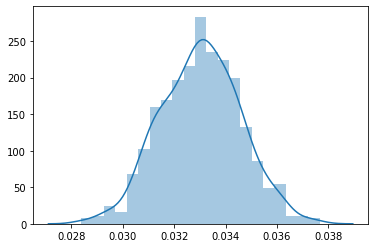

In [58]:
sns.distplot(results)